<a href="https://colab.research.google.com/github/AuraFrizzati/Applied-Text-Mining-in-Python/blob/main/ATMP_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applied Text Mining in Python - Week 3: Classification of Text**

**Learning Objectives**
- Compare **text classification** to other classification approaches (covered in Applied Machine Learning in Python as well)
- Describe the **Naive Bayes** and **Support Vector Machine algorithms**
- **Classify text in two classes** using one of these approaches in **Python**
- Identify and **extract features** from **text** and **transform** them into **feature vectors** for the **machine learning models**

## **3.1: Text Classification**

It is achieved via **supervised learning** for text.

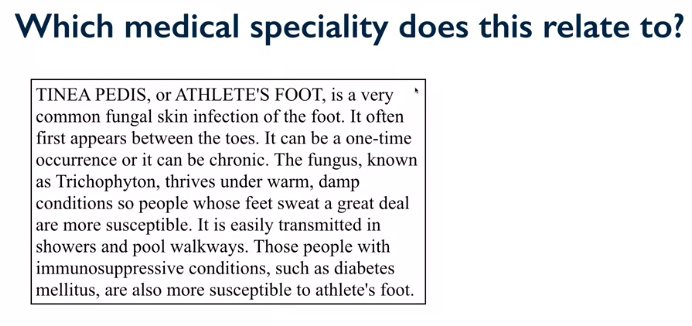

- Looking at the words in the text it is visible the text belongs to podiatry field, although the word "podiatry" is never mentioned in the text... How do we know?

### **What is classifications?**

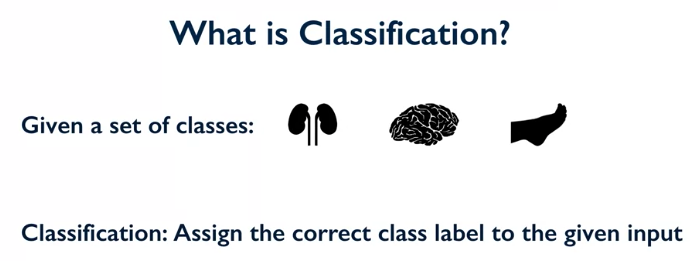

### **Examples of Text Classification**
- **Topic identification**
- **Spam detection**
- **Sentiment analysis**
- **Spelling correction**

All these are examples of **supervised classification**: 

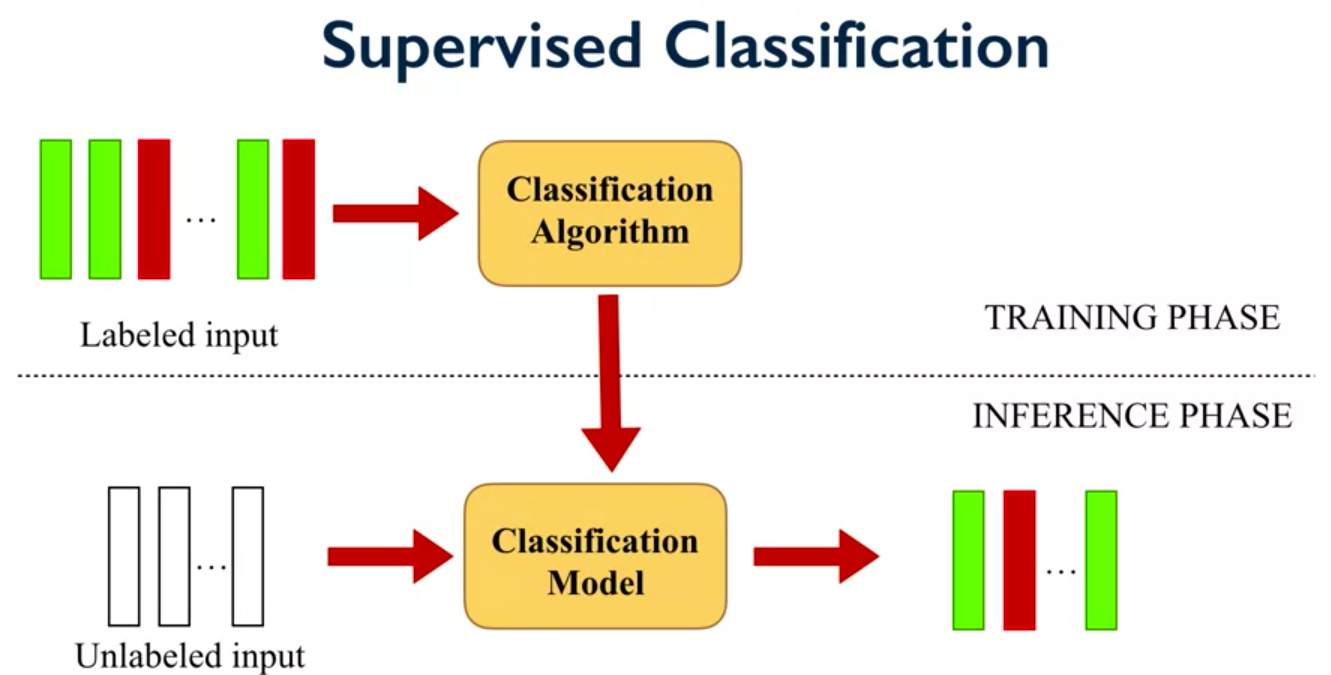

- The algorithm learns a **classification model** on properties (**features**) and their importance (**weights**) from **labelled instances**.
  - $X$: Set of **attributes** or **features** ${x_1, x_2, ..., x_n}$
  - $y$: a **class label** from the **label set** $Y = {y_1, y_2, ..., y_n}$
- The **model** is **applied** on **new instances** to predict the label.

### **Supervised classification: Phases and Datasets**

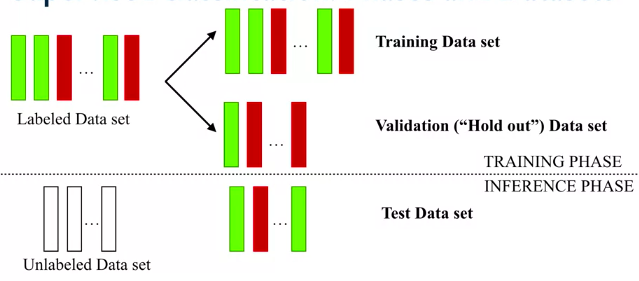

### **Classification paradigms**
- **Binary classification**: when there are **only 2 possible label classes** ($Y = 2$)
- **Multi-class classification**: when there are **> 2 possible label classes** ($Y > 2$)
- **Multi-label classification**: when **data instances** can have **2 or more labels**

### **Questions to ask in Supervised Learning**
- **Training Phase**:
  - What are the features? How do you represent them?
  - What is the classification model/algorithm?
  - What are the model parameters?
- **Inference Phase**:
  - What is the expected performance? What is a good measure?

## **3.2: Identifying Features from Text**

### **Why is textual data unique?**
- Textual data presents a unique set of challenges
- All the information you need is in the text
- But **features** can be pulled out from text at **different granularities**!

### **Type of textual features**
- Words:
  - By far the **most common class** of features
  - Handling **commonly-occurring words**: **Stop words**.
  - **Normalisation issues**: e.g. make lower case vs leave as-is (e.g. "parliament"/"Parliament", vs "us"/"US".
  - **Stemming/Lemmatization**: e.g. you do not want plurals to be different features
- **Characteristics of words: Capitalisation** is an important feature to identify specific words and meanings ("US", "White House").
- **Part-Of-Speech** (**POS**) of words in a sentence: e.g. to establish that "the wether" is "weather" rather than "whether" because it is preceeded by a determinant)
- **Grammatical structure** (sentence parsing), e.g. which verbs refers to which noun in a sentence.
- **Grouping words** of **similar meanings** (**semantics**), e.g. you might not want multiple features to represent different synonyms such as: 
  - {buy, purchase} 
  - {Mr, Ms, Dr, Prof}
  - numbers/digits
  - dates
- Depending on classification tasks, features may come from inside words and word sequences:
  - **Bigrams**, **trigrams**, **n-grams** (e.g. bigram "White House" is one concept)
  - **character sub-sequences** in words: e.g. "ing" (for denoting a verb), "ion" (likely to be a noun), ...


## **3.3: Naive Bayes Classifiers**

### **Case study: Classifying text search queries**
- Suppose you are interested in classifying search queries in 3 classes: Entertainment, Computer Science (CS) and Zoology
- Most common class of the 3 is Entertainment
- Suppose the query is "Python", it is ambivalent:
  - Python the snake (Zoology) --> most common class
  - Python the programming language (CS)
  - Monty Python (Entertainment)

- Suppose now the query is "Python download" --> with this extra information we can say that the most probable class given the query is CS.

### **Probabilistic Model**
- **Update** the **likelihood** of the **class** given **new information**
- **Prior probability**: Pr(y = Entertainment), Pr(y = CS), Pr(y = Zoology), their sum = 1
- **Posterior probability**: Pr(y = Entertainment | x = "Python")

**Bayes Rule**
$$Posterior~probability = \frac{Prior~probability*Likelihood}{Evidence}$$

$$Pr(y|X) = \frac{Pr(y)*Pr(X|y)}{Pr(X)}$$

### **Naive Bayes Classification**
$$Pr(CS|"Python")=\frac{Pr(CS)*Pr("Python"|CS)}{Pr("Python")}$$



$$Pr(Zoology|"Python")=\frac{Pr(Zoology)*Pr("Python"|Zoology)}{Pr("Python")}$$




$$Pr(Entertainment|"Python")=\frac{Pr(Entertainment)*Pr("Python"|Entertainment)}{Pr("Python")}$$

If $Pr(CS|"Python")$ > $Pr(Zoology|"Python")$ and $Pr(CS|"Python")$ > $Pr(Entertainment|"Python")$ $\rightarrow$ $y = CS$

- For the **Naive Bayes Classifier** it is actually **important** only **which** of the 3 **labels** is **more likely** (their order), not the precise probabilities:

$$y^*= \underset{y}{\operatorname{arg max}}{Pr(y|X)} = \underset{y}{\operatorname{arg max}}{Pr(y)*Pr(X|y)} $$

- Furthermore, the classifier makes the **naive assumption**: given the class label, **features** are **assumed to be independent** of each other. 

$$y^*= \underset{y}{\operatorname{arg max}}{Pr(y|X)} = \underset{y}{\operatorname{arg max}}{Pr(y)*\Pi_{i=1}^{n}{Pr(x_i|y)}} $$

Example -> Query = "Python download"

$$y^*=  \underset{y}{\operatorname{arg max}}{Pr(y)*Pr("Python"|y)*("download"|y)} $$


### **Naive Bayes: what are the parameters?**
- **Prior probabilities**: $Pr(y)$ for all $y$ in $Y$
- **Likelihood**: $Pr(x_i|y)$ for all features $x_i$ and labels $y$ in $Y$

Example: if there are 3 classes ($|Y|=3$) and 100 binary features (dimensions) in $X$, how many parameters does naive Bayes models have?

$|Y| + |Y|*2|X|= 3(prior~probabilities) + 100*2*3 (likelihoods) = 603$



(features: $Pr(x_i | y)$ for every binary feature $x_i$ in $X$ and $y$ in $Y$. Specifically, for a particular feature $x_1$, the parameters are $Pr(x_1 = 1 | y)$ and $Pr(x_1 = 0 | y)$ for every y. So if $|X| = 100$ binary features and $|Y| = 3$, there are $(2 x 100) x 3 = 600$ such features)



### **Naive Bayes: Learning parameters**
- **Prior probabilities**: $Pr(Y)$ for all $y$ in $Y$. 
  - Training data is used to estimate these: the n**umber of instances in each outcome class** is **counted** in the **training set**.
  - If there are $N$ instances in all and $n$ out of those are labelled as class $y$: $ Pr(y) = n/N $
- **Likelihood**: $Pr(x_i|y)$ for all features $x_i$ and labels $y$ in $Y$
  - Count how many times feature $x_i$ appears in instances labeled as class $y$
  - If there are $p$ instances of class $y$ and $x_i$ appears in $k$ of those: $Pr(x_i|y) = k/p$


### **Naive Bayes: Smoothing**
- What happens is $Pr(x_i|y) = 0$?
  - Feature $x_i$ never occurs in documents labeled $y$
  - But then, the posterior probability of $Pr(y|x_i)$ will be 0
- Instead, **smooth the parameters**:
  - **Laplace smoothing** or **Additive smoothing**: **add** a **dummy count** (of one) to **every word** in **every class**. This does not change the order of posterior probabilities because of the way they are computed (**maximum likelihood estimation**, which is typically robust when we have large numbers although not so much with small numbers):
  $Pr(x_i|y) = (k+1)/(p+n)$, where $n$ is the number of features ($n$ gets added to the denominator because $1$ has been added to each word, i.e. $n$ times.

### **Take home concepts**
- **Naive Bayes** is a **probabilistic model**
- It is called **Naive** because it assumes **features** are **independent** of each other, **given the class label** (althought words like "white" and "house" tend to be present together, so they are not actually independent).
- Despite the limits, for **text classification problems**, **Naive Bayes models** typically provide **very strong baselines**.
- Simple model, **easy to learn parameters** (they are just **counts**)

## **3.4: Naive Bayes Variations**

There are two ways in which **Naive Bayes features** could be learned.

### **Two Classic Naive Bayes Variants for text**
- **Multinomial Naive Bayes**
  - Data follows a **multinomial distribution**
  - It is assumed that all features defining a particular data instance are independent of each other and can also have multiple occurrences.
  - Each **feature value** is a **count** (**word occurrence counts**, **TF-IDF weighting** or Term Frequency-Inverse Document Frequency weighting, ...)
  - Using this model you can give a higher weight to words that occur rarely in a corpus and a smaller weight to those that occur very frequently (e.g. stop words such as 'the')

- **Multivariate Bernoulli Naive Bayes**
  - Data follows a **multivariate Bernoulli distribution**
  - Each **feature** is **binary** (**word** is **present/absent**)






https://sebastianraschka.com/Articles/2014_naive_bayes_1.html#3_3_multivariate

## **3.5: Support Vector Machines (SVMs)**

- In general, a **classifier** can be seen as a **function** acting on **input data**.
- It is typical to have **numbers** (such as +1 and -1) assigned to **output classes** when using **linear classifiers** (such SVMs)

### **Decision Boundaries**

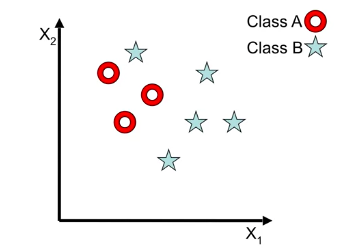

- A decision boundary is required to separate elements of the 2 classes
- The **classification function** is represented by **decision boundaries/surfaces**. The choice of the shape to use is completely dependent on the application. How do you find them?
- Establishing a decision boundary allows to label a new unlabelled sample.

### **Choosing a Decision Boundary**

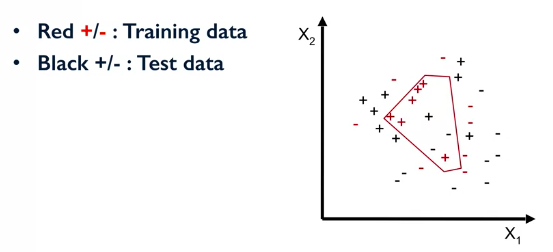

- To separate the +/- classes in the training data (red) a decision boundary was traced (in red as an irregular pentagon)
- However it is not a good decision boundary when the model is applied on the test data (black)
- This problem is called **data overfitting**: the decision boundary learned over training data doesn't generalise to test data

- We can try again to trace a boundary now using a linear one:

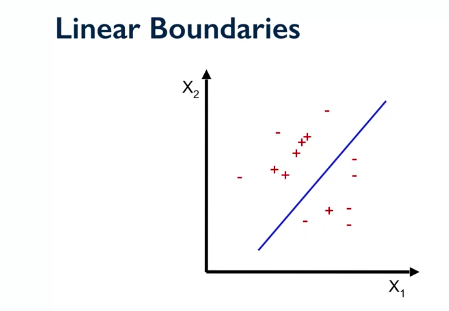

- On the training set, this model is **not 100% accurate** (there is no line that can separate all (+)s from (-)s) but it is very **easy to find**
- It is also **easy to evaluate**
- **More generalisable** (**Occam's razor**: **simple models generalise better**)
- If you apply the test points on top of this new model you can see that they almost all get correctly classified:

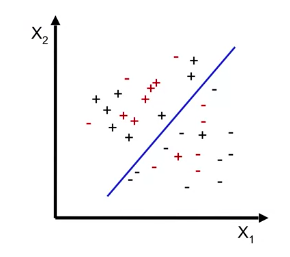

### **Finding a Linear Boundary**
- Find the **slope of the line** (w), multidimensionally it has the same size as the number of dimensions.
- Many **linear methods**:
  - **Perceptron**
  - **Linear Discriminative Analysis**
  - **Linear least squares**
  - **SVMs**
  - ...
- Problem: if the **classes** are **linearly separable** there is an **infinite number of linear boundaries**.

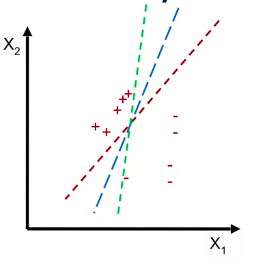


- Example: considering this linear boundary between class (+) and (-):

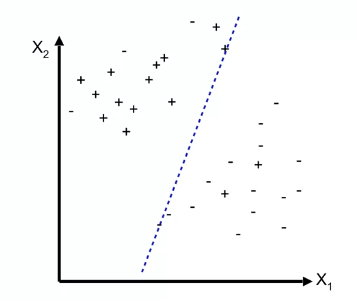

- Some samples here look confusing as they lie on the line itself.

- What is a reasonable boundary?
- Consider instead of a line a band defined by the two red lines:

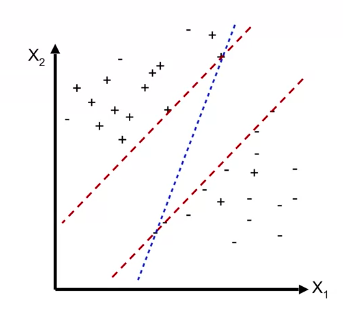

- Considering the blue line, a small change in a data point could lead to a big change in the classifier, see example:

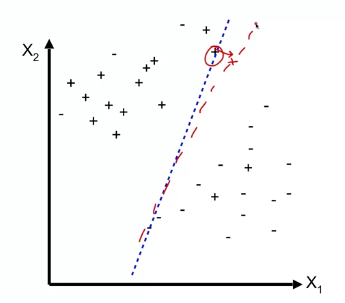

- Instead if you use a band rather than a line, small changes in the data point would not change the classification of the sample:

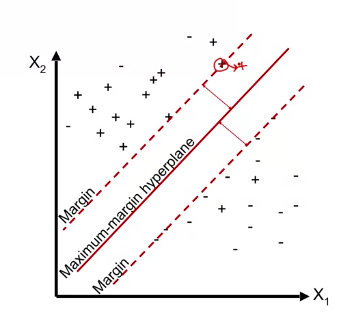

### **Maximum Margin**
- The **band** as a **decision boundary** is **more resistant to data noise** than the **simple line**. 
- This leads to concept of **maximum margin**: the algorithm needs to **learn the tickest band** that it can fit to **separate points** belonging from the two classes.
- The band or thickness is called the **margin** and the middle line between two margins is called the **maximum-margin hyperplane**.
- The classifier traces the maximum margin on the basis of a set of points called **support vectors** which are the most sensitive to the band;s shift. Small changes or perturbations to the support vectors still would not change their classification since that happens with respect to the maximum-margin hyperplane.

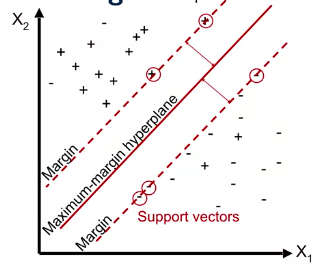



- In general, **SVMs** are **maximum-margin classifiers**.

### **SVMs**
- **SVMs** are **linear classifiers** that find a **hyperplane** to **separate two classes of data** (e.g. positive/negative)
- Given training data $(X_1,y_1), (X_2,y_2), ...$; where $X_i=(x_1, x_2, ..., x_n)$ is the **instance (feature) vector** and $y_i$ is one of $\{-1, +1\}$
  - SVM finds a linear function $w$ (**weight vector**) such that:
  $$f(x_i)=<w.x_1>+b$$, $$if~f(x_i)\geq0,~y_i=+1;~else~y_i=-1$$

- The function returns the dot product between $w$ and $x_i$ plus some bias $b$
- SVM works only for **binary classification problems**

### **SVM: Multi-class Classification**
Two scenarios:
- **One vs Rest**: 
  - The algorithm works as a **binary classifier** **dividing one class from all the reamining classes**
  - This binary classification is carried out for **all the available classes**, creating **$n$ binary classifiers**, with $n$ being the number of classes to predict.
  - **n-class SVM** has **n binary classifiers**

  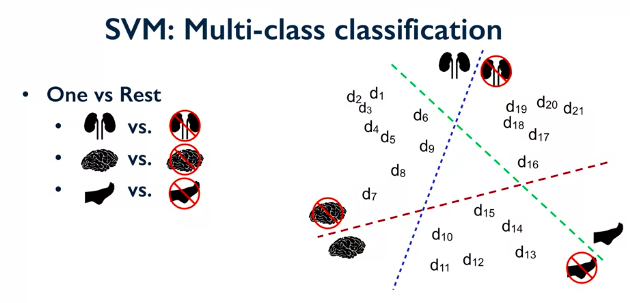



- **One vs One**:
  - The **binary classifier** learns how to **discriminate between two specific classes** among all the available ones
  - More classifiers are built to discriminate between each pairs of classes available
  - **n-class SVM** has **C(n,2) binary classifiers**

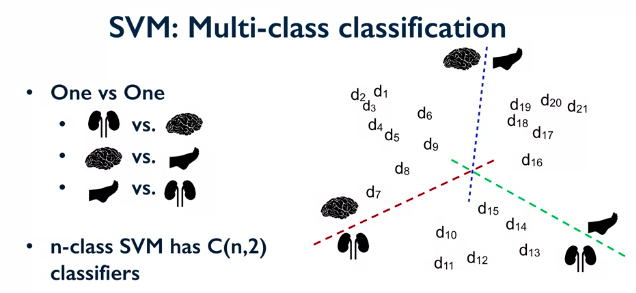

**Calculate combinations in Python:**

In [ ]:
from itertools import combinations
comb = combinations([1, 2, 3, 4, 5], 2)
for i in list(comb):
    print (i)
comb

(1, 2)
(1, 3)
(1, 4)
(1, 5)
(2, 3)
(2, 4)
(2, 5)
(3, 4)
(3, 5)
(4, 5)


In [ ]:
comb = (5*4*3*2*1)/((3*2*1)*(2*1)) ## combinations (N, k) = N!/[(N-k)!*k!]
comb

10.0

### **SVM Paramaters**
- **Parameter c**: it defines **regularisation**, i.e. how much **importance** should be given to **correctly label individual data points** as compared to a **better generalised model**
  - **Larger values of c** = **less regularisation** (fit training data as well as possible, every data point is important)
  - **Smaller values of c** = **more regularisation** (more tolerant to errors on individual data points, this provides simpler models)
  - In most packages, c = 1, but its value can be changed
- **Linear kernels** usually work best for **text data** (other kernels include polynomial, rbf = regular basis function)
- **multi_class**: 
  - **ovr** (**one vs rest**) learns less number of classifiers than one vs one and thus it is preferred
- **class_weight**: different classes can get different weights. E.g. classifying spam vs non-spam, knowing that the class spam constitutes 80% of emails, you want to give different weights to different classes



### **Take Home Messages**
- **SVMs** tend to be the **most accurate classifiers**, especially in **high dimensional data**
- **Strong theoretical foundation** (optimisation theory)
- It handles **only numeric features** (because it calculates dot product between features and weights):
  - **Convert categorical features to numeric features**
  - **Normalisation** (you do not want some features to have very high numbers and others very low, you want them to be within **range [0,1]**, so that each feature gets enough importance)
- The **hyperplane** is **hard to interpret** (thus explanation for classification should not be a priority)

## **3.6: Learning Text Classifiers in Python**

### **Toolkits for Supervised Text Classification**
- **Scikit-learn**
- **NLTK**: it interfaces with sklearn and other ML toolkits (like Weka)

### **Scikit-learn**
- Open-source ML library
- Started as Google Summer of Code by Dave Cournapeau, 2007
- It has a more programmatic interface (e.g. in comparison with Weka which is more a GUI)

### **Using sklearn NaiveBayesClassifier**

In [ ]:
from sklearn import naive_bayes

In [ ]:
 clfrNB = naive_bayes.MultinomialNB()
 clfrNB

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
## to train the defined classifier:
#clfrNB.fit(train_data, train_labels)

## to predict the labels on the test data:
# predicted_labels = clfrNB.predict(test_data)

## check discrimination metrics:
#metrics.f1_score(test_labels, predicted_labels, average='micro')


### **Using sklearn SVM Classifier**

In [ ]:
from sklearn import svm
clfrSVM = svm.SVC(kernel = 'linear', C =0.1) ##SVC = Support Vector Classifier
clfrSVM

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
## to train the defined classifier:
#clfrSVM.fit(train_data, train_labels)

## to predict the labels on the test data:
# predicted_labels = clfrSVM.predict(test_data)

### **Model Selection**
- Recall the discussion on multiple phases in supervised learning:

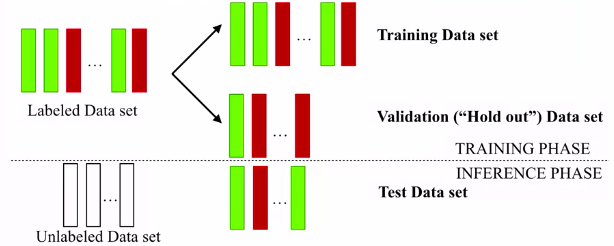

- Typically, the test data is not labelled
- You need to use some of the training data to evaluate the trained models: **Model selection problem**, two ways of doing it:
  -  Keep some of the training data separate from training for vlaidation (**hold-out dataset**)
  - Use **cross-validation**

### **Model Selection in scikit learn/1 (hold-out validation dataset)**

In [ ]:
from sklearn import model_selection

#X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, 
#                                                                    train_labels, 
#                                                                    test_size = 0.333, 
#                                                                    random_state = 0)

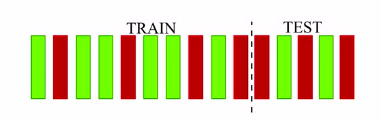

- Using this model selection method leads to the **loss** of a **significant portion** of the **training data**. The **test data** is **used exclusively** to **tune the parameters**.

### **Model Selection in scikit learn/2 (cross-validation)**

In [ ]:
from sklearn import model_selection

#X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, 
#                                                                    train_labels, 
#                                                                    test_size = 0.333, 
#                                                                    random_state = 0)

#predicted_labels = model_selection.cross_val_predict(clfrSVM,train_data, train_lables, cv =5)

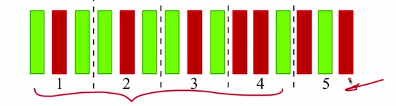

- You train and test on all combinations of 4 folds (train) + remaining fold (test), in the case of cv = 5
- The results get averaged across the folds
- It is also common to run cv multiple times to reduce variance

### **Supervised Text Classification in NLTK**
- NLTK has some classification algorithms:
  - NaiveBayesClassifier
  - DecisionTreeClassifier
  - ConditionalExponentialClassifier
  - MaxentClassifier
  - **WekaClassifier**
  - SklearnClassifier


### **Using NLTK's NaiveBayesClassifier**

In [ ]:
from nltk.classify import NaiveBayesClassifier

## train
#classifier = NaiveBayesClassifier.train(train_set)

## test
#classifier.classify(unlabeled_instance)
#classifier.classify_many(unlabeled_instances)

## evaluate classifier's performance
#nltk.classify.util.accuracy(classifier, test_set)

#classifier.labels()

#classifier.show_most_informative_features()

For SVM there is no native NLTK function but you can use sklearn functions via NLTK:

In [ ]:
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

#clfrNB = SklearnClassifier(Multinomial.NB()).train(train_set)

#clfrSVM = SklearnClassifier(SVC(), kernel = 'linear').train(train_set)